In [1]:
import numpy as np
from network import Network
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
import metrics

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))
plt.rc('figure', facecolor=(1,1,1,1))


## Ejercicio 1

In [2]:
def plot(dataset, network):
    X = [x[0][0] for x in dataset]
    Y = [x[0][1] for x in dataset]
    c = [x[1][0] for x in dataset]

    plt.scatter(X, Y, c=c,  cmap="coolwarm",s=100)

    m, a, b = network.w[-1][0]  # mx + ay + b = 0

    x = np.linspace(-2, 2, 100)
    y = (-m*x - b)/a
    plt.plot(x, y)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks([-1, 1])
    plt.yticks([-1, 1])
    plt.xlabel('E1')
    plt.ylabel('E2')
    plt.show()


### 1.a

Epochs: 3


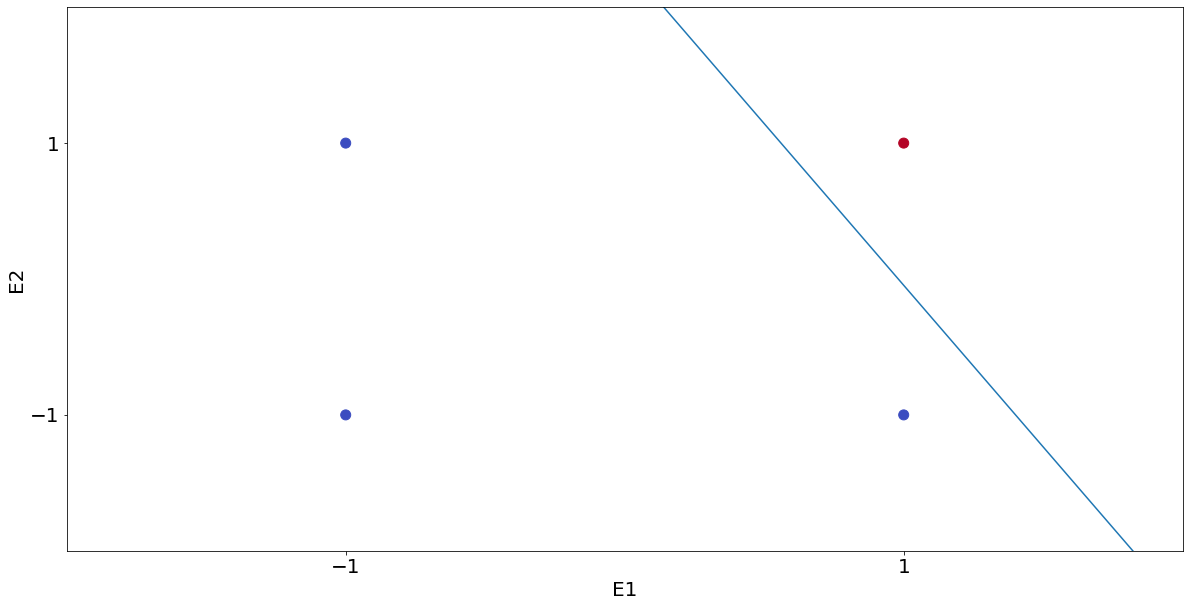

In [3]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [-1]],
    [[1, -1], [-1]],
    [[1, 1], [1]]
]

network = Network(structure=([2, 1]), activation='step', seed=17)
errors = network.train(dataset, target_error=0)
print("Epochs:", len(errors))
plt.figure("AND")
plot(dataset, network)



#### animation

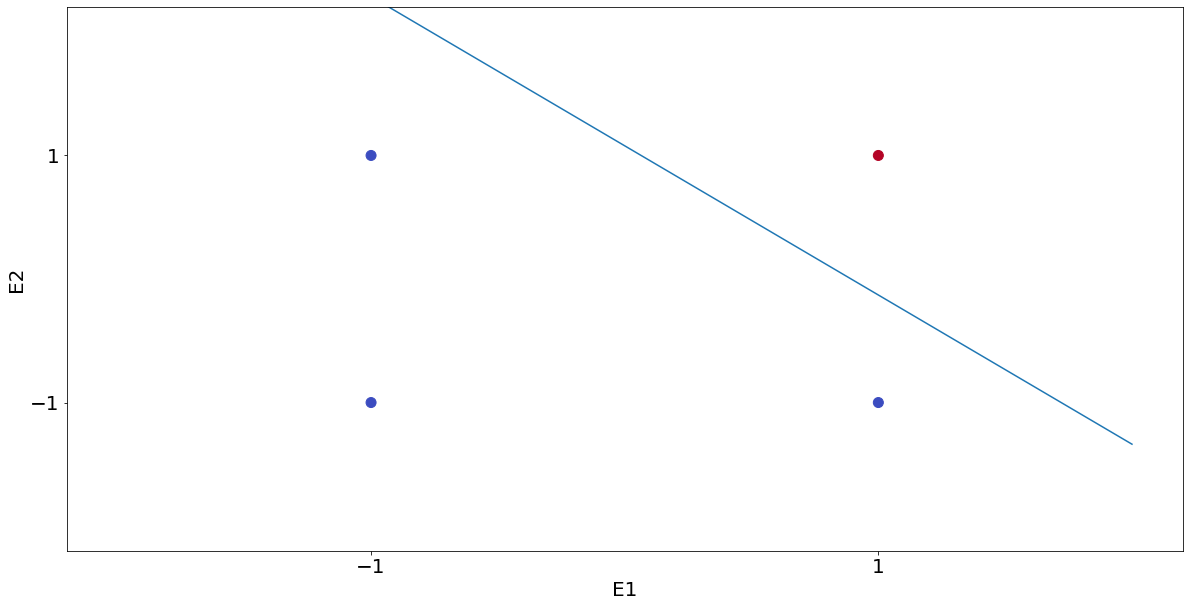

In [4]:
plt.figure("AND animation")
data = []
x = np.linspace(-2, 2, 100)
line, = plt.plot(x, x)
X = [x[0][0] for x in dataset]
Y = [x[0][1] for x in dataset]
c = [x[1][0] for x in dataset]
plt.xticks([-1, 1])
plt.yticks([-1, 1])
plt.xlabel('E1')
plt.ylabel('E2')
plt.scatter(X, Y, c=c, cmap="coolwarm", s=100)


def callback(network):
    m, a, b = network.w[-1][0]  # mx + ay + b = 0
    data.append((m, a, b))


def update(frame):
    m, a, b = data[frame]
    y = (-m*x - b)/a
    line.set_ydata(y)
    return line


network = Network(structure=([2, 1]), activation='tanh', seed=17)

network.train(dataset, epochs=100, callback=callback, learning_rate=0.01)
anim = animation.FuncAnimation(
    plt.gcf(), update, frames=len(data)-1, interval=1)

anim.save('ej1.a.mp4', fps=60)

anim = []

update(len(data)-1)

plt.show()


### 1.b

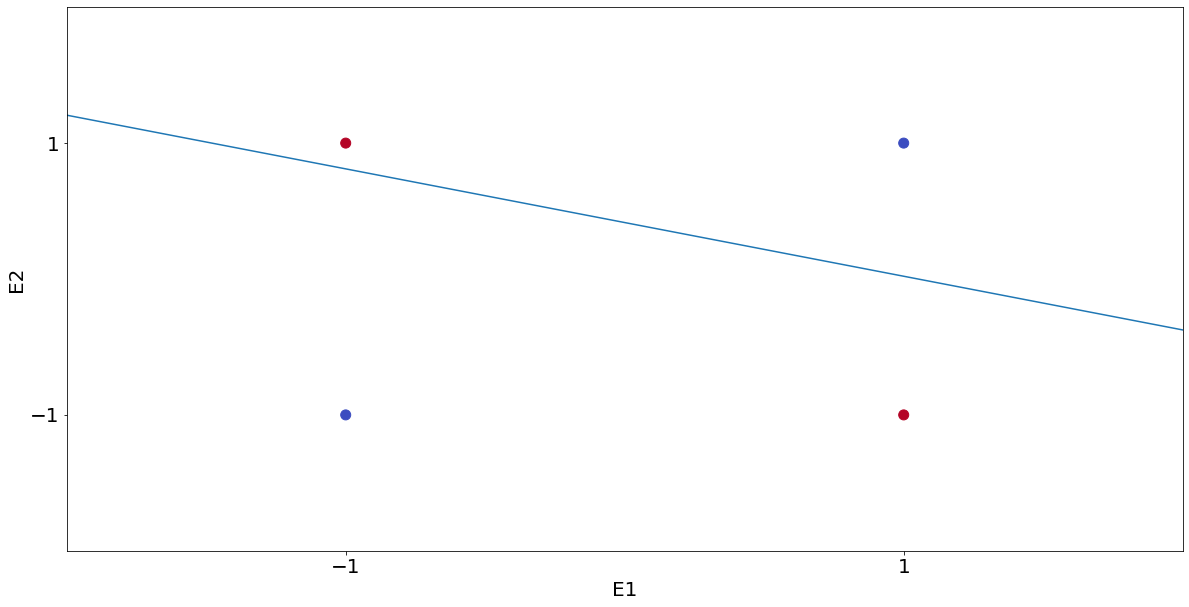

In [5]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]


network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset, epochs=1000)

plot(dataset, network)
